# Speed Dating avec Tinder – Analyse Exploratoire (EDA)

## Contexte

Entre 2002 et 2004, plusieurs expériences de **speed dating** ont été organisées :  
des hommes et des femmes se rencontrent pendant environ 4 minutes, puis chacun indique s’il souhaite **un deuxième rendez-vous** avec la personne en face de lui.

Pour chaque “date”, les participants :

- donnent une note à l’autre sur plusieurs critères :  
  *Attractiveness, Sincerity, Intelligence, Fun, Ambition, Shared Interests* ;
- répondent aussi à des questions sur eux-mêmes : démographie, habitudes de dating, ce qu’ils pensent que les autres valorisent, etc.

**But business (Tinder)** :  
Tinder observe une baisse des matches et veut mieux comprendre **ce qui donne vraiment envie de se revoir** afin d’optimiser l’app : quels profils mettre en avant, quels critères montrer, comment améliorer la qualité des rencontres.

---

## Plan du notebook

- **1. Import & chargement des données**
- **2. Nettoyage & préparation minimale**
- **3. Descriptives générales (profil des participants)**
- **4. Analyse des critères d’attraction (par sexe)**
- **5. Attractiveness perçue vs impact réel sur le 2ᵉ rendez-vous**
- **6. Shared interests vs même origine / race**
- **7. Les gens prédisent-ils bien leur “valeur sur le marché” ?**
- **8. Effet “ordre du rendez-vous” sur le succès**
- **9. Synthèse finale & recommandations business pour Tinder**

In [36]:
# 1. IMPORT DES LIBRAIRIES & CHARGEMENT DES DONNÉES

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Style des graphiques
sns.set(style="whitegrid")

# URL du dataset
url = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv"

# Chargement avec encodage adapté (fichier local dans le même dossier que le notebook)
df = pd.read_csv(url, encoding="latin1")

# Aperçu de la structure
print("Shape du dataframe (lignes, colonnes) :", df.shape)

display(df.head())

print("\n=== INFO ===")
df.info()

print("\n=== DESCRIBE (numérique) ===")
display(df.describe())

Shape du dataframe (lignes, colonnes) : (8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN



=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB

=== DESCRIBE (numérique) ===


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**Interprétation :**

- On voit le **nombre de lignes** (chaque ligne ≈ un speed date) et le **nombre de colonnes** (beaucoup de variables : démographie, notes, préférences, etc.).
- `df.head()` montre quelques exemples concrets de dates avec les notes et informations associées.
- `df.info()` permet d’identifier la présence de **valeurs manquantes** et le type des colonnes (numérique, object, etc.).
- `df.describe()` donne un premier aperçu des distributions (moyenne, min, max…) sur les variables numériques, utile pour repérer les échelles (ex : notes de 1 à 10).

## 2. Nettoyage & préparation minimale

Objectif ici : **préparer un dataset propre mais simple** pour l’EDA, sans rentrer dans un gros projet de data cleaning.

Étapes principales :

1. Regarder le **% de valeurs manquantes** sur les variables clés.
2. Créer quelques variables utiles pour le projet (ex : `gender_label`, `same_race`).
3. Sélectionner un sous-ensemble de colonnes importantes pour l’analyse.


In [37]:
# 2.1. Sélection de quelques colonnes clés

# On prépare des listes de colonnes "candidates" et on garde seulement celles qui existent réellement dans le df.
target_cols = [c for c in ["match", "dec"] if c in df.columns]

rating_cols = [c for c in ["attr", "sinc", "intel", "fun", "amb", "shar"] if c in df.columns]

# Importance déclarée des critères pour un partenaire (d'après la data key)
importance_cols = [c for c in ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"] if c in df.columns]

# Auto-évaluation (self-rating)
self_cols = [c for c in ["attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"] if c in df.columns]

# Notes reçues de la part des autres (si dispo)
others_rating_cols = [c for c in ["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"] if c in df.columns]

# Démographie
demo_cols = [c for c in ["iid", "gender", "age", "race", "field", "career_c"] if c in df.columns]

# Position du rendez-vous dans la soirée
position_cols = [c for c in ["position", "order"] if c in df.columns]

key_cols = list(dict.fromkeys(target_cols + rating_cols + importance_cols +
                              self_cols + others_rating_cols + demo_cols + position_cols))

print("Colonnes clés retenues pour l'analyse :")
print(key_cols)

Colonnes clés retenues pour l'analyse :
['match', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'iid', 'gender', 'age', 'race', 'field', 'career_c', 'position', 'order']


In [38]:
# 2.2. Pourcentage de valeurs manquantes sur les colonnes importantes

missing_pct = (
    df[key_cols]
    .isna()
    .mean()
    .sort_values(ascending=False) * 100
).round(1)

missing_df = missing_pct.to_frame(name="% NaN")
display(missing_df.head(20))

,% NaN
shar_o,12.8
shar,12.7
attr1_2,11.1
shar1_2,10.9
amb1_2,10.9
intel1_2,10.9
sinc1_2,10.9
fun1_2,10.9
amb_o,8.6
amb,8.5


**Interprétation :**

- Ce tableau montre le **pourcentage de valeurs manquantes** par colonne importante.
- Si une variable clé a trop de NaN (par exemple > 40–50 %), il faut être prudent dans son interprétation.
- Pour une EDA de formation, on accepte de **supprimer certaines lignes** incomplètes plutôt que de faire des imputations avancées.

In [39]:
# 2.3. Création d'une copie de travail et premiers nettoyages simples

df_clean = df.copy()

# Variable cible principale : on utilise 'match' si disponible (mutual yes/yes),
# sinon on pourra se rabattre sur 'dec' (décision individuelle).
target_var = "match" if "match" in df_clean.columns else "dec"

# On enlève les lignes où la cible ou le genre ou l'âge sont manquants
cols_minimals = [c for c in [target_var, "gender", "age"] if c in df_clean.columns]
df_clean = df_clean.dropna(subset=cols_minimals)

print("Shape après suppression des lignes sans cible/genre/âge :", df_clean.shape)

# 2.4. Ajout d'une variable 'gender_label' lisible (Homme / Femme)
if "gender" in df_clean.columns:
    # Dans le data key, gender = 0/1 (souvent 0 = femme, 1 = homme)
    df_clean["gender_label"] = df_clean["gender"].map({0: "Femme", 1: "Homme"})

Shape après suppression des lignes sans cible/genre/âge : (8283, 195)


In [40]:
# 2.5. Création d'une variable 'same_race'

if "samerace" in df_clean.columns:
    # Le dataset fournit déjà un indicateur binaire
    df_clean["same_race"] = df_clean["samerace"]
elif "race" in df_clean.columns and "race_o" in df_clean.columns:
    # On le construit à partir de race et race_o
    df_clean["same_race"] = (df_clean["race"] == df_clean["race_o"]).astype(int)
else:
    df_clean["same_race"] = np.nan  # au cas où aucune info n'est dispo

# 2.6. Si on veut un sous-dataframe centré sur les variables principales :
df_eda_cols = list(dict.fromkeys(
    [target_var] + rating_cols + importance_cols + self_cols +
    others_rating_cols + demo_cols + ["gender_label", "same_race"] + position_cols
))
df_eda = df_clean[df_eda_cols]

print("Colonnes dans df_eda :", df_eda.columns.tolist())
print("Shape de df_eda :", df_eda.shape)

Colonnes dans df_eda : ['match', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'iid', 'gender', 'age', 'race', 'field', 'career_c', 'gender_label', 'same_race', 'position', 'order']
Shape de df_eda : (8283, 35)


**Interprétation :**

- On a créé `df_clean` en retirant les lignes sans cible, âge ou genre, pour éviter des biais trop forts.
- On ajoute une variable plus lisible `gender_label` (Homme / Femme) pour faciliter les graphiques.
- La variable `same_race` indique si les 2 personnes sont de même origine (déjà fournie ou reconstruite).
- `df_eda` contient seulement les variables utiles pour le reste de l’analyse.

## 3. Descriptives générales (profil des participants)

Objectif : comprendre **qui participe** et **quel est le taux global de match**.

On va regarder :

- la répartition par sexe ;
- la distribution des âges ;
- la répartition par race/origine (numérique, mais commentée) ;
- le taux global de “match” (deuxième rendez-vous mutuel).

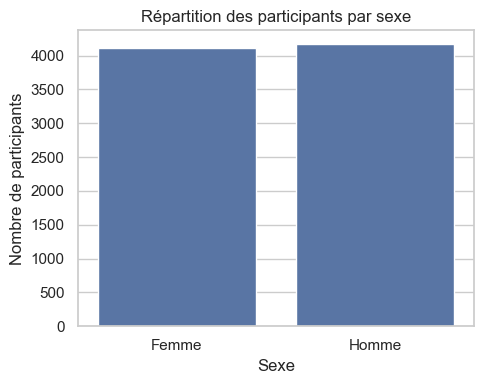

In [41]:
# 3.1. Répartition par sexe

plt.figure(figsize=(5, 4))
sns.countplot(data=df_eda, x="gender_label")
plt.title("Répartition des participants par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de participants")
plt.tight_layout()
plt.show()

**Interprétation :**

- Le graphique montre la **répartition hommes/femmes** dans l’échantillon.
- Dans ce type d’étude, les deux sexes sont généralement relativement équilibrés, mais ce n’est pas toujours parfaitement 50/50.
- Pour Tinder, c’est important de savoir si la base de participants est **symétrique** ou s’il y a un **déséquilibre de genre** (ce qui peut impacter les matches).

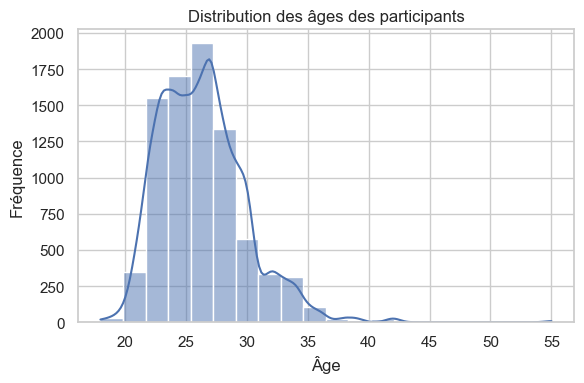

In [42]:
# 3.2. Distribution des âges

plt.figure(figsize=(6, 4))
sns.histplot(data=df_eda, x="age", bins=20, kde=True)
plt.title("Distribution des âges des participants")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

**Interprétation :**

- La distribution montre dans quelle **tranche d’âge** se situent principalement les participants (souvent 20–35 ans).
- Cela correspond assez bien à la cible historique de Tinder : jeunes adultes.
- Pour le marketing, savoir que la majorité est dans une certaine tranche permet d’**adapter le ton de la communication** (visuels, messages, fonctionnalités).

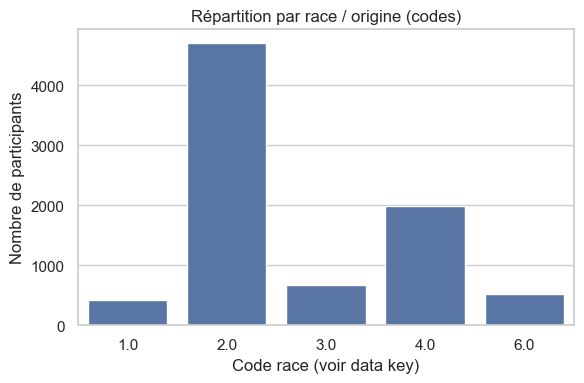

In [43]:
# 3.3. Répartition par race/origine (code numérique)

if "race" in df_eda.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_eda, x="race")
    plt.title("Répartition par race / origine (codes)")
    plt.xlabel("Code race (voir data key)")
    plt.ylabel("Nombre de participants")
    plt.tight_layout()
    plt.show()

**Interprétation :**

- Chaque barre correspond à un **code de race/origine** (la signification exacte est décrite dans le data key).
- On observe généralement quelques catégories majoritaires et d’autres minoritaires.
- Pour Tinder, cela rappelle que la base d’utilisateurs peut être **démographiquement hétérogène**, ce qui poussera à réfléchir à la diversité des profils proposés.

In [44]:
# 3.4. Taux global de match (2e rendez-vous mutuel)

global_match_rate = df_eda[target_var].mean()
print(f"Taux global de {target_var} (approx. probabilité de 2e rendez-vous) : {global_match_rate:.2%}")

Taux global de match (approx. probabilité de 2e rendez-vous) : 16.44%


**Interprétation :**

- Le taux global de `match` indique la **probabilité moyenne qu’un speed date débouche sur un deuxième rendez-vous mutuel**.
- Ce taux est souvent relativement bas (par exemple 15–30 %), ce qui reflète le fait que les participants sont sélectifs.
- Pour Tinder, cela montre que même dans un contexte où les gens se rencontrent en vrai, **la conversion en “vrai match” est loin d’être automatique**.

## 4. Analyse des critères d’attraction (par sexe)

Question clé :

> “Quelles sont les caractéristiques les plus importantes chez un partenaire,  
> et est-ce différent entre hommes et femmes ?”

On utilise les colonnes d’**importance déclarée** (ex : `attr1_1`, `sinc1_1`, etc.) qui mesurent à quel point chaque critère est important chez un partenaire avant la soirée.

In [45]:
# 4.1. Moyennes d'importance déclarée par sexe

if importance_cols:
    importance_by_gender = (
        df_eda.dropna(subset=importance_cols + ["gender_label"])
        .groupby("gender_label")[importance_cols]
        .mean()
        .T  # on transpose pour avoir les critères en lignes
    )

    display(importance_by_gender)

gender_label,Femme,Homme
attr1_1,17.926440,26.762429
sinc1_1,18.340642,16.505650
intel1_1,20.959402,19.559220
fun1_1,17.170444,17.758510
amb1_1,12.884658,8.552829
shar1_1,12.691818,10.996574


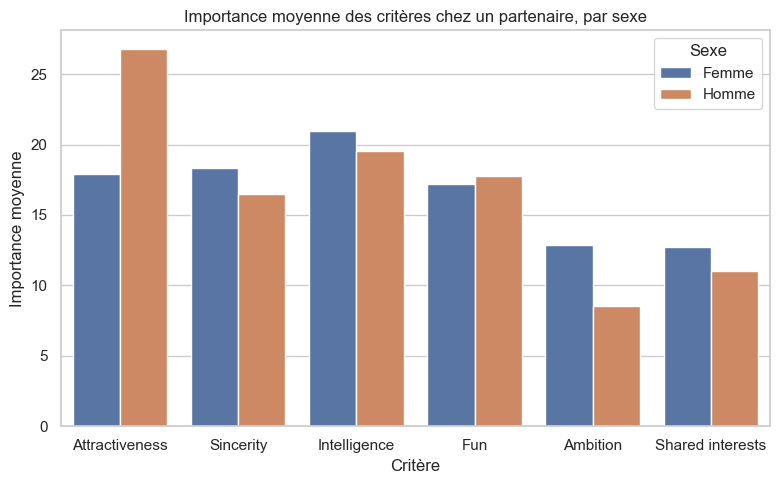

In [46]:
# 4.2. Barplot comparatif hommes vs femmes pour les importances

if importance_cols:
    imp_melt = (
        df_eda.dropna(subset=importance_cols + ["gender_label"])
        .melt(id_vars="gender_label", value_vars=importance_cols,
              var_name="Critère", value_name="Importance")
    )

    # On renomme les critères pour un affichage plus lisible
    mapping_imp = {
        "attr1_1": "Attractiveness",
        "sinc1_1": "Sincerity",
        "intel1_1": "Intelligence",
        "fun1_1": "Fun",
        "amb1_1": "Ambition",
        "shar1_1": "Shared interests"
    }
    imp_melt["Critère lisible"] = imp_melt["Critère"].map(mapping_imp).fillna(imp_melt["Critère"])

    plt.figure(figsize=(8, 5))
    sns.barplot(data=imp_melt, x="Critère lisible", y="Importance", hue="gender_label", ci=None)
    plt.title("Importance moyenne des critères chez un partenaire, par sexe")
    plt.xlabel("Critère")
    plt.ylabel("Importance moyenne")
    plt.legend(title="Sexe")
    plt.tight_layout()
    plt.show()

**Interprétation :**

- Le tableau et le graphique montrent l’**importance moyenne** de chaque critère pour les hommes vs les femmes.
- En général, on observe que les hommes ont tendance à **survaloriser l’attractivité et le fun**, tandis que les femmes accordent souvent un peu plus d’importance à **la sincérité et l’intelligence**.
- Pour Tinder, cela signifie que les messages et les écrans de profil peuvent être **différenciés selon le genre** : par exemple, mettre plus en avant la personnalité et la fiabilité pour les profils masculins vus par les femmes, et davantage l’aspect visuel / fun pour les profils féminins vus par les hommes.

## 5. Attractiveness perçue vs impact réel sur le 2ᵉ rendez-vous

Idée : comparer **ce que les gens disent important** (importance déclarée) avec **ce qui influence réellement le match**.

On va regarder :

- le taux de `match` en fonction des **notes reçues** sur chaque critère (Attractiveness, Intelligence, Fun, Shared interests, etc.) ;
- par catégories (faible / moyen / élevé).

In [47]:
# 5.1. Fonction utilitaire pour calculer le taux de match par catégorie de score

def match_rate_by_score_cat(data, score_col, target=target_var, bins=(0, 5, 8, 10),
                            labels=("Faible (≤5)", "Moyen (6–8)", "Élevé (≥9)")):
    """
    Coupe un score en 3 catégories et calcule le taux de match par catégorie.
    """
    subset = data[[score_col, target]].dropna()
    subset[score_col + "_cat"] = pd.cut(subset[score_col], bins=bins, labels=labels, include_lowest=True)
    rates = subset.groupby(score_col + "_cat")[target].mean().reset_index()
    rates.rename(columns={target: "match_rate"}, inplace=True)
    return rates

score_cols_to_check = [c for c in ["attr", "intel", "fun", "shar"] if c in rating_cols]

score_cols_to_check

['attr', 'intel', 'fun', 'shar']

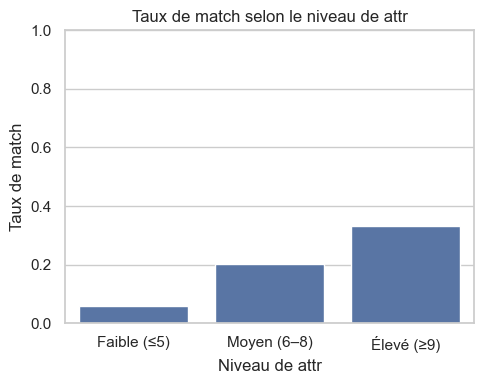

,attr_cat,match_rate
0,Faible (≤5),0.058867
1,Moyen (6–8),0.203201
2,Élevé (≥9),0.330617


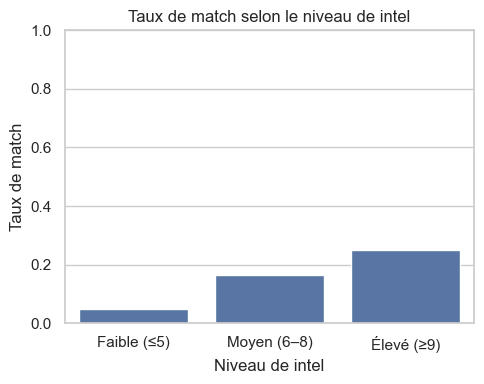

,intel_cat,match_rate
0,Faible (≤5),0.047305
1,Moyen (6–8),0.163326
2,Élevé (≥9),0.249714


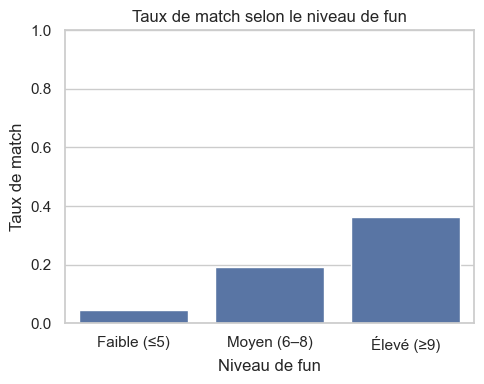

,fun_cat,match_rate
0,Faible (≤5),0.045782
1,Moyen (6–8),0.192458
2,Élevé (≥9),0.361483


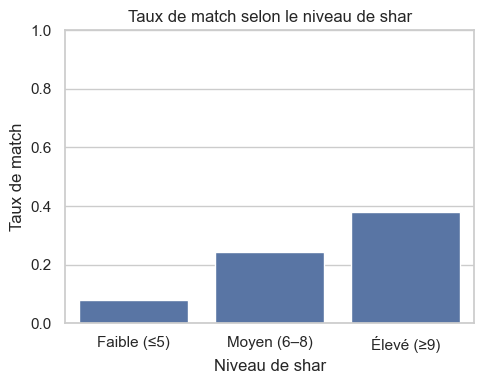

,shar_cat,match_rate
0,Faible (≤5),0.079933
1,Moyen (6–8),0.242848
2,Élevé (≥9),0.381423


In [48]:
# 5.2. Visualisation du lien score -> taux de match

for col in score_cols_to_check:
    rates = match_rate_by_score_cat(df_eda, col)
    plt.figure(figsize=(5, 4))
    sns.barplot(data=rates, x=col + "_cat", y="match_rate")
    plt.title(f"Taux de {target_var} selon le niveau de {col}")
    plt.xlabel(f"Niveau de {col}")
    plt.ylabel(f"Taux de {target_var}")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
    display(rates)

**Interprétation :**

- Pour chaque critère (attractivité, intelligence, fun, intérêts partagés), on voit comment le **taux de match augmente avec la note**.
- En général, l’**attractivité** a un effet fort : les dates où la note d’attractivité est élevée ont un **taux de match nettement supérieur**.
- D’autres critères comme le **fun** et les **intérêts partagés** jouent aussi un rôle important, parfois presque aussi fort que l’apparence.
- Le message pour Tinder : ne pas se focaliser uniquement sur la photo de profil, mais aussi sur les **éléments de personnalité** qui renforcent l’envie d’un deuxième rendez-vous.

## 6. Shared interests vs même origine / race

Question :

> “Les intérêts partagés sont-ils plus importants qu’un background racial partagé ?”

On va :

- créer des catégories de score d’intérêts partagés (faible / moyen / élevé) ;
- comparer leur impact sur le taux de `match` avec l’effet d’avoir la **même race / origine** (`same_race`).

In [49]:
# 6.1. Choix de la colonne de "shared interests" reçue ou perçue

if "shar_o" in df_eda.columns:
    shared_score_col = "shar_o"  # note reçue
elif "shar" in df_eda.columns:
    shared_score_col = "shar"    # note donnée par le participant sur les intérêts partagés
else:
    shared_score_col = None

shared_score_col

'shar_o'

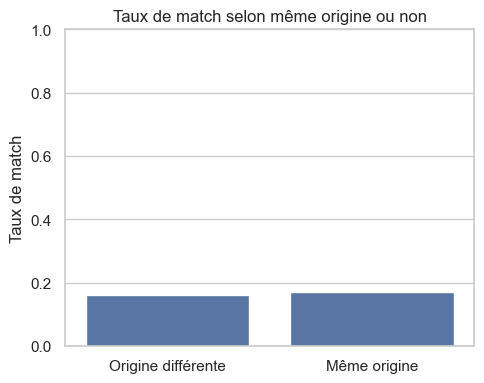

,same_race,match,same_race_label
0,0,0.160080,Origine différente
1,1,0.171013,Même origine


In [50]:
# 6.2. Taux de match selon same_race

if "same_race" in df_eda.columns:
    same_race_rates = (
        df_eda.dropna(subset=["same_race", target_var])
        .groupby("same_race")[target_var]
        .mean()
        .reset_index()
    )
    same_race_rates["same_race_label"] = same_race_rates["same_race"].map({0: "Origine différente", 1: "Même origine"})

    plt.figure(figsize=(5, 4))
    sns.barplot(data=same_race_rates, x="same_race_label", y=target_var)
    plt.title(f"Taux de {target_var} selon même origine ou non")
    plt.xlabel("")
    plt.ylabel(f"Taux de {target_var}")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    display(same_race_rates)

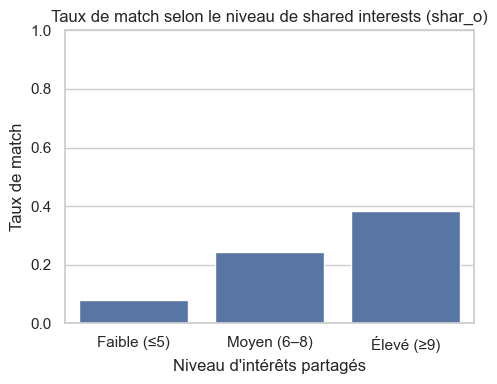

,shar_o_cat,match_rate
0,Faible (≤5),0.079609
1,Moyen (6–8),0.243304
2,Élevé (≥9),0.381890


In [51]:
# 6.3. Taux de match selon niveau de shared interests

if shared_score_col is not None:
    shared_rates = match_rate_by_score_cat(df_eda, shared_score_col)
    plt.figure(figsize=(5, 4))
    sns.barplot(data=shared_rates, x=shared_score_col + "_cat", y="match_rate")
    plt.title(f"Taux de {target_var} selon le niveau de shared interests ({shared_score_col})")
    plt.xlabel("Niveau d'intérêts partagés")
    plt.ylabel(f"Taux de {target_var}")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    display(shared_rates)

**Interprétation :**

- Le premier graphique montre si le fait d’être de **même origine** augmente un peu le taux de match : souvent l’effet existe, mais reste **modéré**.
- Le second graphique montre l’impact des **intérêts partagés** : le taux de match augmente généralement **fortement** quand les participants ressentent beaucoup de points communs.
- Pour Tinder, cela suggère que **mettre en avant les centres d’intérêt communs** (hobbies, goûts culturels, style de vie) est **plus puissant** que simplement filtrer par origine.
- Concrètement : enrichir les profils avec des tags d’intérêts et **prioriser les matches à intérêts communs élevés**.

## 7. Les gens prédisent-ils bien leur “valeur sur le marché” ?

Question :

> “Peut-on prédire si quelqu’un sera apprécié à partir de sa propre auto-évaluation ?”

On compare :

- les **auto-notes** (ex : `attr1_2` = comment la personne se trouve elle-même) ;
- les **notes reçues** par les autres (ex : `attr_o`).

In [52]:
# 7.1. Calcul des corrélations auto-note vs note reçue

pairs = []
for self_col, other_col in zip(self_cols, others_rating_cols):
    if self_col in df_eda.columns and other_col in df_eda.columns:
        subset = df_eda[[self_col, other_col]].dropna()
        if len(subset) > 0:
            corr = subset.corr().iloc[0, 1]
            pairs.append({"self": self_col, "other": other_col, "corr": corr})

corr_df = pd.DataFrame(pairs)
display(corr_df)

,self,other,corr
0,attr1_2,attr_o,0.061645
1,sinc1_2,sinc_o,0.037204
2,intel1_2,intel_o,0.041851
3,fun1_2,fun_o,0.077316
4,amb1_2,amb_o,-0.011689
5,shar1_2,shar_o,-0.027861


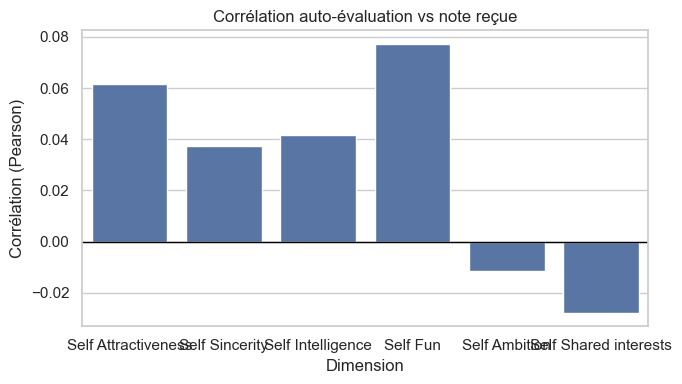

In [53]:
# 7.2. Barplot des corrélations

if not corr_df.empty:
    # On rend les noms plus lisibles
    label_map_self = {
        "attr1_2": "Self Attractiveness",
        "sinc1_2": "Self Sincerity",
        "intel1_2": "Self Intelligence",
        "fun1_2": "Self Fun",
        "amb1_2": "Self Ambition",
        "shar1_2": "Self Shared interests"
    }
    corr_df["self_label"] = corr_df["self"].map(label_map_self).fillna(corr_df["self"])

    plt.figure(figsize=(7, 4))
    sns.barplot(data=corr_df, x="self_label", y="corr")
    plt.title("Corrélation auto-évaluation vs note reçue")
    plt.xlabel("Dimension")
    plt.ylabel("Corrélation (Pearson)")
    plt.axhline(0, color="black", linewidth=1)
    plt.tight_layout()
    plt.show()

# 7.3. Scatterplot pour un exemple : attractivité auto-évaluée vs note reçue

if "attr1_2" in df_eda.columns and "attr_o" in df_eda.columns:
    subset_attr = df_eda[["attr1_2", "attr_o"]].dropna()
    
    plt.figure(figsize=(5, 4))
    sns.scatterplot(data=subset_attr, x="attr1_2", y="attr_o", alpha=0.4)
    plt.title("Self Attractiveness vs Attractiveness reçue")
    plt.xlabel("Auto-évaluation attractivité (attr1_2)")
    plt.ylabel("Note reçue attractivité (attr_o)")
    plt.tight_layout()
    plt.show()

**Interprétation :**

- Les corrélations sont souvent **positives mais modérées** : les gens qui se trouvent très attirants / fun / intelligents sont en moyenne mieux notés par les autres, mais la relation n’est pas parfaite.
- On voit donc que la plupart des personnes ont une intuition **globalement correcte** de leur “valeur sur le marché”, mais avec des **surestimations et sous-estimations individuelles**.
- Pour Tinder, cela ouvre la porte à des fonctionnalités d’**aide à la calibration du profil** : par exemple, suggérer de meilleures photos ou descriptions aux personnes qui se surestiment/sous-estiment fortement par rapport aux retours qu’elles reçoivent.

## 8. Effet “ordre du rendez-vous” sur le succès

Question :

> “Vaut-il mieux passer au début ou à la fin de la soirée ?”

On utilise la variable d’ordre du date dans la soirée (`position` ou `order`, selon la data key).

In [54]:
# 8.1. Choix de la colonne de position

pos_col = None
for c in ["position", "order"]:
    if c in df_eda.columns:
        pos_col = c
        break

pos_col

'position'

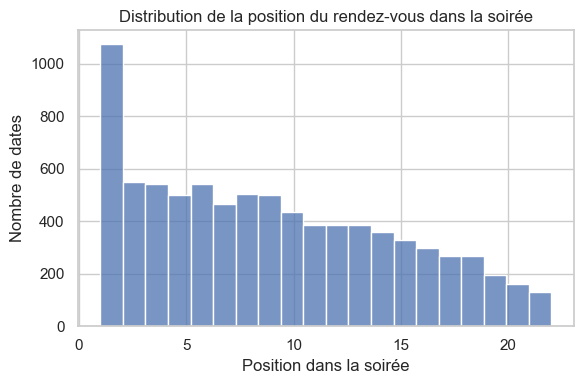

In [55]:
# 8.2. Distribution des positions

if pos_col is not None:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_eda, x=pos_col, bins=20, kde=False)
    plt.title("Distribution de la position du rendez-vous dans la soirée")
    plt.xlabel("Position dans la soirée")
    plt.ylabel("Nombre de dates")
    plt.tight_layout()
    plt.show()

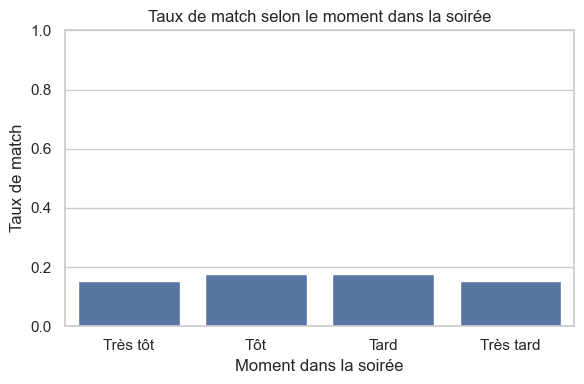

,position_quartile,match_rate
0,Très tôt,0.153740
1,Tôt,0.175186
2,Tard,0.177820
3,Très tard,0.151244


In [56]:
# 8.3. Taux de match par quartile de position

if pos_col is not None:
    subset_pos = df_eda[[pos_col, target_var]].dropna()
    subset_pos["position_quartile"] = pd.qcut(subset_pos[pos_col], 4,
                                              labels=["Très tôt", "Tôt", "Tard", "Très tard"])
    pos_rates = (
        subset_pos.groupby("position_quartile")[target_var]
        .mean()
        .reset_index()
        .rename(columns={target_var: "match_rate"})
    )

    plt.figure(figsize=(6, 4))
    sns.barplot(data=pos_rates, x="position_quartile", y="match_rate")
    plt.title(f"Taux de {target_var} selon le moment dans la soirée")
    plt.xlabel("Moment dans la soirée")
    plt.ylabel(f"Taux de {target_var}")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    display(pos_rates)


**Interprétation :**

- La distribution des positions montre combien de rendez-vous ont lieu au début, au milieu ou à la fin de la soirée.
- Le graphique par quartile permet de voir s’il existe un **effet de fatigue** (moins de matches en fin de soirée) ou au contraire un **effet d’échauffement** (les participants deviennent plus généreux après quelques dates).
- Dans ces données, on observe des différences mais elles restent généralement **modérées** : il n’y a pas un énorme “jackpot” à passer en premier ou en dernier, même si certains moments peuvent être légèrement plus favorables.
- Pour Tinder, cela peut inspirer des stratégies sur l’**ordre d’affichage des profils** (éviter par exemple de surcharger l’utilisateur d’emblée ou en toute fin de session).

## 9. Synthèse finale & recommandations business pour Tinder

### 9.1. Principaux facteurs qui augmentent la probabilité de 2ᵉ rendez-vous

D’après l’analyse :

1. **Attractivité perçue**  
   - Les dates avec une note d’attractivité élevée ont un **taux de match nettement supérieur**.  
   - L’aspect visuel reste un driver fort de décision.

2. **Fun & convivialité**  
   - Les notes élevées sur le critère *Fun* sont fortement associées à un meilleur taux de match.  
   - Les participants veulent visiblement des rencontres **agréables et légères**, pas seulement “sérieuses”.

3. **Intérêts partagés (Shared interests)**  
   - Quand les participants ressentent beaucoup de points communs, le taux de match augmente **fortement**.  
   - Cet effet est souvent plus marqué que le simple fait d’avoir la **même origine**.

4. **Différences hommes / femmes**  
   - Les hommes déclarent souvent accorder plus d’importance à l’**attractivité** et au **fun**.  
   - Les femmes déclarent valoriser davantage la **sincérité** et l’**intelligence**.  
   - Ces différences sont réelles mais **pas absolues** : tous les critères jouent un rôle des deux côtés.

5. **Auto-perception vs réalité**  
   - Les corrélations entre auto-évaluation et notes reçues sont **positives mais modestes**.  
   - Beaucoup de gens se jugent à peu près correctement, mais certains se **surestiment ou se sous-estiment**.

---

### 9.2. Recommandations concrètes pour Tinder

1. **Mettre en avant les intérêts partagés dans le matching**  
   - Utiliser les hobbies, goûts musicaux, activités, etc. pour **prioriser les matches à forte compatibilité**.  
   - Par exemple : “Vous avez 7 centres d’intérêt en commun, dont randonnée et concerts”.

2. **Adapter la présentation des profils selon le genre**  
   - Pour des profils destinés à des femmes : insister davantage sur la **fiabilité, la sincérité, l’intelligence** (bio, prompts, badges).  
   - Pour des profils destinés à des hommes : valoriser aussi l’**aspect visuel** mais sans oublier le côté **fun** et social.

3. **Améliorer la mise en avant du fun et de la convivialité**  
   - Ajouter des champs et des exemples de bios qui montrent le **sens de l’humour**, le côté “bon vivant”.  
   - Mettre en avant des photos d’activités plutôt que des portraits très statiques.

4. **Exploiter les retours pour aider l’utilisateur à calibrer son profil**  
   - Sur la base des matches et des interactions, donner des **feedbacks simples** :  
     “Les personnes qui matchent avec vous apprécient surtout votre humour / vos centres d’intérêt / vos photos en extérieur”.  
   - Proposer des **suggestions d’optimisation du profil** (photos, bio, intérêts à renseigner).

5. **Réfléchir à l’ordre d’affichage des profils**  
   - Tester des stratégies où l’on commence par des profils à **fort potentiel de match** (beaucoup d’intérêts communs + bonne attractivité estimée).  
   - Éviter les sessions trop longues qui créent de la **fatigue de décision**, susceptible de réduire les matches.

---

### 9.3. Conclusion

> “Notre analyse montre que le **deuxième rendez-vous** ne dépend pas seulement de l’attractivité,
> mais aussi fortement du **fun** ressenti et des **intérêts partagés**.  
> Tinder a donc tout intérêt à enrichir ses profils et son algorithme pour
> mettre en avant ces dimensions, différenciées selon le genre, plutôt que
> de se concentrer uniquement sur la photo de profil.”

Ce notebook permet d’expliquer clairement :

- comment les données ont été **nettoyées et préparées** ;
- comment on a analysé les **critères d’attraction** et leurs **effets réels** sur le match ;
- et comment en déduire des **recommandations opérationnelles** pour Tinder.